In [1]:
%env KMP_DUPLICATE_LIB_OK=TRUE 
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np

from nfmd import NFMD
from utils import get_noise

# Pull out common plotting settings:
from plot_params import get_plot_params
full_params, half_params = get_plot_params()
plt.rcParams.update(full_params)

env: KMP_DUPLICATE_LIB_OK=TRUE


In [2]:
##########################
##  Load the input data ##
##########################
numpts = 30000

# Load the forcing
file_stem = "./Simulations/"
f = np.load(file_stem+"input_force.npy")
f = f[:numpts]

# Define sampling frequency
fs = 10e6

# Create a time vector, define dt
tau = 10000
z = np.load(file_stem + "defl_{}ns.npy".format(tau))[:numpts]
n = z.shape[0]
t = np.linspace(0, n/fs, n)
dt = t[1]-t[0]

In [3]:
# Load in file and average trials
fn = file_stem + "defl_{}ns.npy".format(tau)
z = np.load(fn)[:numpts]
z += get_noise(z, SNR=100)


###############
# Nonstationary Fourier Mode Decomposition
###############

nfmd = NFMD(z/np.std(z)+1,
            num_freqs=2,
            window_size=30,
            optimizer_opts={'lr': 1e-04},
            max_iters=500,
            target_loss=1e-4) # target_loss=5e-4)

freqs, A, losses, indices = nfmd.decompose_signal(500)

n_freqs = nfmd.correct_frequencies(dt=dt)
n_amps = nfmd.compute_amps()
n_mean = nfmd.compute_mean()

0/29971|500/29971|1000/29971|1500/29971|2000/29971|2500/29971|3000/29971|3500/29971|4000/29971|4500/29971|5000/29971|5500/29971|6000/29971|6500/29971|7000/29971|7500/29971|8000/29971|8500/29971|9000/29971|9500/29971|10000/29971|10500/29971|11000/29971|11500/29971|12000/29971|12500/29971|13000/29971|13500/29971|14000/29971|14500/29971|15000/29971|15500/29971|16000/29971|16500/29971|17000/29971|17500/29971|18000/29971|18500/29971|19000/29971|19500/29971|20000/29971|20500/29971|21000/29971|21500/29971|22000/29971|22500/29971|23000/29971|23500/29971|24000/29971|24500/29971|25000/29971|25500/29971|26000/29971|26500/29971|27000/29971|27500/29971|28000/29971|28500/29971|29000/29971|29500/29971|

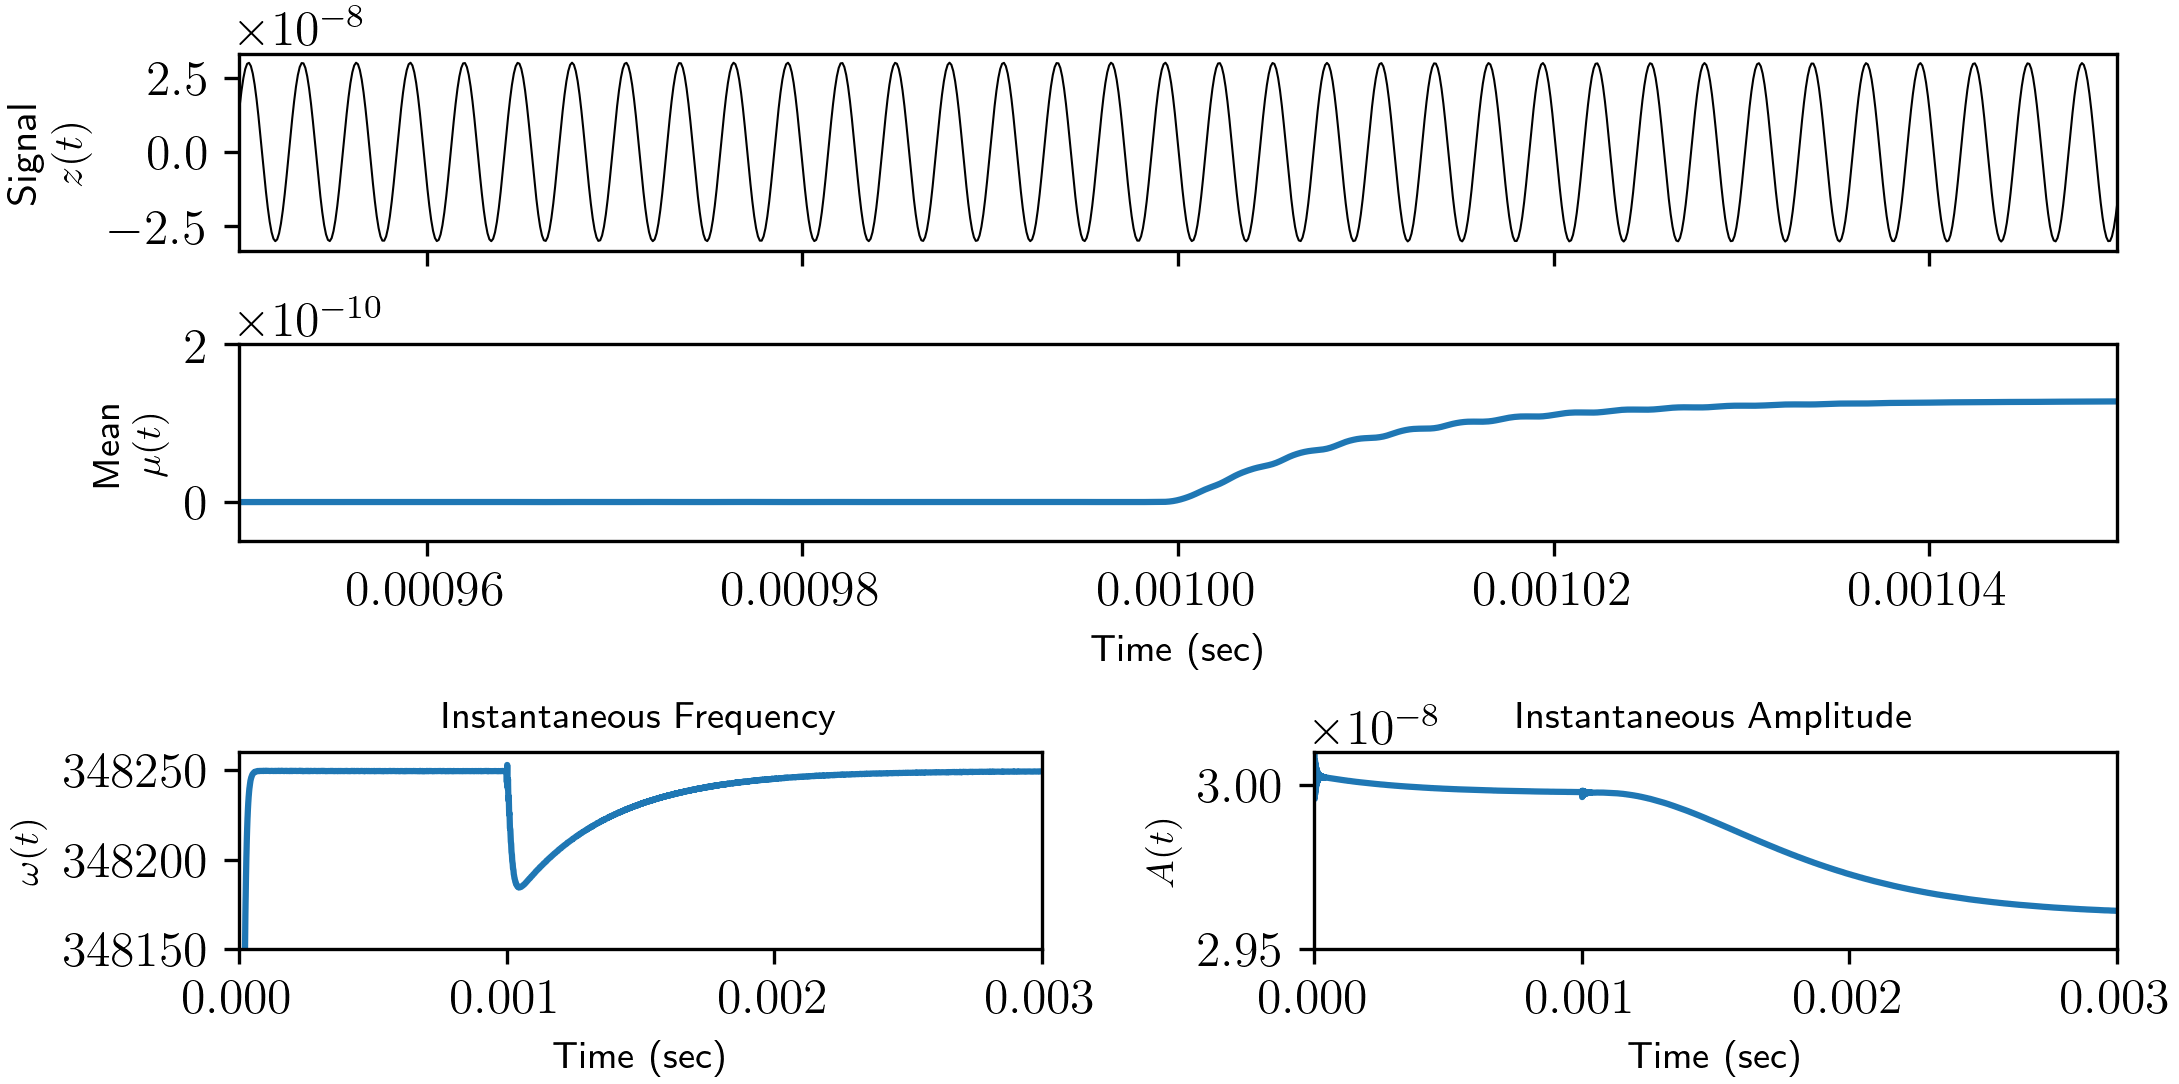

In [4]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 2)

idcs = np.asarray(nfmd.mid_idcs)

color = 'orange'

##############################################
## Axes List 1 -- Top Row -- Signal Example ##
##############################################
ax1 = fig3.add_subplot(gs[0, :])
ax1.plot(t, z, lw=0.5, color='k')
ax1.set_ylabel('Signal\n$z(t)$')

##########################################
## Second row -- Third Mode Comparisons ##
##########################################
ax2 = fig3.add_subplot(gs[1,:], sharex=ax1)

ax2.plot(t[nfmd.mid_idcs], -1*(n_mean-1)*np.std(z), label='NFMD')

#ax2.legend(bbox_to_anchor=(1,-0.75), loc='right', ncol=3, fontsize=9)
ax2.set_ylabel('Mean\n$\mu(t)$', fontsize=9)
ax2.set_xlabel('Time (sec)', fontsize=9)
ax2.set_xlim([0.95e-3,1.05e-3])
ax2.set_ylim([-0.5e-10,2e-10])


# Set up lower axes
ax3a = fig3.add_subplot(gs[2,0])
ax3b = fig3.add_subplot(gs[2,1])

# Hide higher axis xlabels
plt.setp(ax1.get_xticklabels(), visible=False)

# Put titles on the 3a and 3b columns
ax3a.set_title('Instantaneous Frequency', fontsize=9)
ax3b.set_title('Instantaneous Amplitude', fontsize=9)


##########################################
## Third row -- Second Mode Comparisons ##
##########################################
f_idx = 1

ax3a.plot(t[nfmd.mid_idcs], n_freqs[:,f_idx])
ax3b.plot(t[nfmd.mid_idcs], n_amps[:,f_idx]*np.std(z))

# Format axes
ax3a.set_ylabel(r"$\omega(t)$", fontsize=9)
ax3b.set_ylabel('$A(t)$', fontsize=9)
ax3a.set_xlabel('Time (sec)', fontsize=9)
ax3b.set_xlabel('Time (sec)', fontsize=9)

ax3a.set_ylim([3.4815e5,3.4826e5])
ax3b.set_ylim([2.95e-8,3.01e-8])

ax3a.set_xlim([0,3e-3])
ax3b.set_xlim([0,3e-3])


# Final adjustments
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

plt.savefig("Fig10.png")

plt.show()